## Analysis for traffic stop data story
#### Talia Duffy

In [1]:
# importing data from csv file
import pandas as pd
df = pd.read_csv("urbana_portal_traffic_stops.csv")
df

,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,STEP INDICATOR,GEO CODE,ANONYMOUS HOUSE NUMBER,ADDRESS STREET,CROSS STREET,MOTIVATION FOR STOP DESC,RACE DESCRIPTION,...,PARAPHRENALIA FOUND CANINE SEARCH,ALCOHOL FOUND CANINE SEARCH,WEAPON FOUND CANINE SEARCH,STOLEN PROPERTY FOUND CANINE SEARCH,OTHER CONTRABAND FOUND CANINE SEARCH,DRUG AMOUNT FOUND CANINE SEARCH,ANY CONTRABAND FOUND IN VEHICLE CONSENT OR CANINE SEARCH,CONSENT OR DOG SNIFF SEARCH CONDUCTED,MAPPING ADDRESS,MAPPING POINT
0,01/01/2013,02:50,UU1300001,NOT STEP,547-08,400.0,UNIVERSITY AV E,NaN,NaN,WHITE,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,400 UNIVERSITY AV E,POINT (-88.20343138499999 40.11637237800005)
1,01/01/2013,02:50,UU1300001,NOT STEP,547-08,400.0,UNIVERSITY AV E,NaN,NaN,WHITE,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,400 UNIVERSITY AV E,POINT (-88.20343138499999 40.11637237800005)
2,01/01/2013,02:50,UU1300001,NOT STEP,547-08,400.0,UNIVERSITY AV E,NaN,NaN,WHITE,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,400 UNIVERSITY AV E,POINT (-88.20343138499999 40.11637237800005)
3,01/01/2013,02:50,UU1300001,NOT STEP,547-08,400.0,UNIVERSITY AV E,NaN,NaN,WHITE,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,400 UNIVERSITY AV E,POINT (-88.20343138499999 40.11637237800005)
4,01/01/2013,02:50,UU1300001,NOT STEP,547-08,400.0,UNIVERSITY AV E,NaN,NaN,WHITE,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,400 UNIVERSITY AV E,POINT (-88.20343138499999 40.11637237800005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36312,09/09/2020,20:28,UW2000552,NOT STEP,605-16,1.0,MCHENRY ST,PHILO RD,TRAFFIC ISSUE,HISPANIC,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,1 MCHENRY ST,POINT (-88.20721291499996 40.08690443200004)
36313,09/09/2022,23:25,UW2216788,NOT STEP,63 -,1.0,MAIN,COLER,TRAFFIC ISSUE,BLACK,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,1 MAIN,POINT (-88.20733334299996 40.11240410000005)
36314,09/09/2022,23:42,UU2216790,NOT STEP,63 -,1.0,E ILLINOIS ST E,@ S BROADWAY AV,TARGETTED PATROL,BLACK,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,1 E ILLINOIS ST E,POINT (-88.20032563299998 40.10935931800003)
36315,09/09/2022,23:42,UU2216790,NOT STEP,63 -,1.0,E ILLINOIS ST E,@ S BROADWAY AV,TARGETTED PATROL,BLACK,...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NaN,YES,NO,1 E ILLINOIS ST E,POINT (-88.20032563299998 40.10935931800003)


In [2]:
# looking at list of columns to see which ones I want to keep
df.columns

Index(['DATE OF CONTACT', 'TIME OF CONTACT', 'INCIDENT NUMBER',
       'STEP INDICATOR', 'GEO CODE', 'ANONYMOUS HOUSE NUMBER',
       'ADDRESS STREET', 'CROSS STREET', 'MOTIVATION FOR STOP DESC',
       'RACE DESCRIPTION', 'SEX DESCRIPTION', 'AGE AT CONTACT',
       'RESIDENCY CODE', 'REASON FOR STOP', 'TYPE OF VIOLATION',
       'CRIME CATEGORY', 'CRIME CATEGORY DESCRIPTION', 'CRIME CODE',
       'CRIME DESCRIPTION', 'CRIME STATUS DESCRIPTION', 'VEHICLE YEAR',
       'VEHICLE CONSENT SEARCH REQUESTED', 'VEHICLE CONSENT SEARCH GRANTED',
       'VEHICLE CONSENT SEARCH CONDUCTED',
       'PARAPHRENALIA FOUND VEHICLE CONSENT SEARCH',
       'ALCOHOL FOUND VEHICLE CONSENT SEARCH',
       'WEAPON FOUND VEHICLE CONSENT SEARCH',
       'STOLEN PROPERTY FOUND VEHICLE CONSENT SEARCH',
       'OTHER CONTRABAND FOUND VEHICLE CONSENT SEARCH',
       'DRUG AMOUNT FOUND VEHICLE CONSENT SEARCH', 'CANINE SNIFF PERFORMED',
       'CANINE ALERTED', 'CANINE SEARCH CONDUCTED',
       'PARAPHRENALIA FOUND 

In [3]:
# since year is essential in my analysis, I am gathering this data from the date of contact column
# doing month too, to see if all months are included.

df["Year"] = pd.DatetimeIndex(data = df["DATE OF CONTACT"]).year
df["Month"] = pd.DatetimeIndex(data = df["DATE OF CONTACT"]).month

##### Potential variables to look at for the story: 
- race vs crime status
- race vs vehicle consent search requested
- race vs vehicle consent search granted

In [4]:
#selecting appropriate columns - eliminating those I don't want
df1 = df[["Year", "Month", "DATE OF CONTACT", "TIME OF CONTACT", "INCIDENT NUMBER", "ADDRESS STREET",
         "RACE DESCRIPTION", "SEX DESCRIPTION", "AGE AT CONTACT",'REASON FOR STOP', 'TYPE OF VIOLATION', 
         'CRIME CATEGORY DESCRIPTION', 'CRIME DESCRIPTION', 'CRIME STATUS DESCRIPTION', 
         'VEHICLE CONSENT SEARCH REQUESTED', 'VEHICLE CONSENT SEARCH GRANTED',
         'VEHICLE CONSENT SEARCH CONDUCTED'
]]

In [5]:
# number of rows in the entire dataframe

len(df1)

36317

In [6]:
# Number of unique incident numbers -- less than the total rows. There are some incidents / people that appear more than once.
len(df1["INCIDENT NUMBER"].unique())

28401

This must be dealt with. We can't have repeats of the same person skewing our results.

In [7]:
#What are the highest occurring incident numbers? This gives me a better sense of how prevalent this issue is.
df.groupby("INCIDENT NUMBER").agg("count").reset_index().sort_values("Month", ascending=False)

,INCIDENT NUMBER,DATE OF CONTACT,TIME OF CONTACT,STEP INDICATOR,GEO CODE,ANONYMOUS HOUSE NUMBER,ADDRESS STREET,CROSS STREET,MOTIVATION FOR STOP DESC,RACE DESCRIPTION,...,WEAPON FOUND CANINE SEARCH,STOLEN PROPERTY FOUND CANINE SEARCH,OTHER CONTRABAND FOUND CANINE SEARCH,DRUG AMOUNT FOUND CANINE SEARCH,ANY CONTRABAND FOUND IN VEHICLE CONSENT OR CANINE SEARCH,CONSENT OR DOG SNIFF SEARCH CONDUCTED,MAPPING ADDRESS,MAPPING POINT,Year,Month
14914,UU1404146,13,13,13,13,13,13,13,0,13,...,13,13,13,0,13,13,13,13,13,13
16030,UU2222826,11,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11
15574,UU1901056,10,10,10,10,10,10,10,10,10,...,10,10,10,0,10,10,10,10,10,10
15797,UU2003254,9,9,9,9,9,9,0,9,9,...,9,9,9,0,9,9,9,9,9,9
16015,UU2221071,9,9,9,9,9,9,0,9,9,...,9,9,9,0,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,UT1800994S,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
10131,UT1800993S,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
10130,UT1800992S,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
10129,UT1800991S,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [8]:
# UU1404146 has 13 separate offesnes -- what can that possibly consist of?
df1[df1["INCIDENT NUMBER"] == "UU1404146"]

,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,RACE DESCRIPTION,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
27616,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Traffic Offenses,RECKLESS DRIVING,TRAFFIC WARNING TICKET,NO,NO,NaN
27617,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Traffic Offenses,DRIVING UNDER SUSPENDED LICENSE,CLEARED BY ADULT ARREST,NO,NO,NaN
27618,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Lost & Found,RECOVERED STOLEN VEHICLE,REFERRED TO OTHER JURISDICTION,NO,NO,NaN
27619,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Theft,POSSESSION STOLEN PROPERTY,REFERRED TO OTHER JURISDICTION,NO,NO,NaN
27620,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Traffic Offenses,FLEEING OR ATTEMPT TO ELUDE POLICE,CLEARED BY ADULT ARREST,NO,NO,NaN
27621,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Traffic Offenses,OPERATE UNINSURED MOTOR VEHICLE,CLEARED BY ADULT ARREST,NO,NO,NaN
27622,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Traffic Offenses,FAILURE TO YIELD AT INTERSECTION,TRAFFIC WARNING TICKET,NO,NO,NaN
27623,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Interfering w/Public Officers,RESIST/OBSTRUCT/DISARM AN OFFICER,CLEARED BY ADULT ARREST,NO,NO,NaN
27624,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Motor Vehicle Theft,THEFT-MOTOR VEHICLE,REFERRED TO OTHER JURISDICTION,NO,NO,NaN
27625,2014,7,07/13/2014,20:16,UU1404146,UNIVERSITY AV,WHITE,FEMALE,52,MOVING VIOLATION,OTHER,Traffic Offenses,IMPROPER LANE USAGE,CLEARED BY ADULT ARREST,NO,NO,NaN


In [9]:
# searches -- how often requested and granted / not granted
df1[(df1["VEHICLE CONSENT SEARCH REQUESTED"] == "YES") & (df1["VEHICLE CONSENT SEARCH GRANTED"] == "YES")]

,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,RACE DESCRIPTION,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
227,2019,1,01/04/2019,21:36,UT1900069,PHILO RD,BLACK,MALE,33,LICENSE PLATE/REG.,NOT A MOVING VIOLATION,Traffic Offenses,DRIVING UNDER REVOKED LICENSE,CLEARED BY ADULT ARREST,YES,YES,NaN
251,2013,1,01/05/2013,23:08,UT1300063,PARK ST W,HISPANIC,MALE,19,MOVING VIOLATION,OTHER,Traffic Offenses,SUSPEND REVOKED DRIVERS LICENSE,CLEARED BY ADULT ARREST,YES,YES,NaN
352,2017,1,01/06/2017,15:53,UW1700020,PARK,WHITE,FEMALE,31,MOVING VIOLATION,SEAT BELT,Traffic Offenses,SEAT BELT-DRIVER & PASSENGER,TRAFFIC WARNING TICKET,YES,YES,NaN
477,2019,1,01/08/2019,08:28,UW1900050,MAIN ST,BLACK,MALE,34,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,FAILURE TO SIGNAL,TRAFFIC WARNING TICKET,YES,YES,NaN
621,2017,1,01/10/2017,02:08,UU1700114,KERR AV,BLACK,MALE,24,EQUIPMENT,NOT A MOVING VIOLATION,Traffic Offenses,DRIVING UNDER SUSPENDED LICENSE,CLEARED BY ADULT ARREST,YES,YES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35505,2020,9,09/23/2020,1:54,UU2004232,ANDERSON ST,BLACK,MALE,NaN,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,DRIVING UNDER REVOKED LICENSE,CLEARED BY ADULT ARREST,YES,YES,NaN
35762,2013,9,09/26/2013,02:59,UU1305564,UNIVERSITY W,BLACK,MALE,63,MOVING VIOLATION,LANE VIOLATION,Traffic Offenses,IMPROPER LANE USAGE,TRAFFIC WARNING TICKET,YES,YES,NaN
35864,2022,9,09/26/2022,10:47,UT2202520S,BLK LINCOLN AV S,WHITE,FEMALE,34,EQUIPMENT,NOT A MOVING VIOLATION,Traffic Offenses,ELECTRONIC COMMUNICATION-TEXTING,CLEARED BY ADULT ARREST,YES,YES,NaN
35865,2022,9,09/26/2022,10:47,UT2202520S,BLK LINCOLN AV S,WHITE,FEMALE,34,EQUIPMENT,NOT A MOVING VIOLATION,Traffic Offenses,OPERATE UNINSURED MOTOR VEHICLE,CLEARED BY ADULT ARREST,YES,YES,NaN


This result tells a story of one woman's interaction with the police. You can see how the situation evolved and escalated over time. Very interesting.

In [10]:
# Since I want to work with year-by-year data to compare ratio over time, let's start pulling that out.

df1_2022 = df1[df1.Year == 2022]
df1_2021 = df1[df1.Year == 2021]

In [11]:
# These are some racial distributions -- NOT OFFICIAL, these results have not dealt with the duplicates yet.
# I just want to see how the data is naturally distributed.

df1_2022.groupby("RACE DESCRIPTION").agg("count").reset_index()

,RACE DESCRIPTION,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
0,AMERICAN INDIAN/ALASKAN,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
1,ASIAN,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,0
2,BLACK,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1010,1025,1025,1025,1025,0
3,HISPANIC,147,147,147,147,147,147,147,147,145,147,147,147,147,147,147,0
4,WHITE,635,635,635,635,635,634,635,635,635,635,634,635,635,635,635,0


In [12]:
df1_2021.groupby("RACE DESCRIPTION").agg("count").reset_index()

,RACE DESCRIPTION,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
0,ASIAN,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,0
1,BLACK,198,198,198,198,198,198,198,195,198,198,195,198,198,198,198,0
2,HISPANIC,56,56,56,56,56,56,56,54,56,56,56,56,56,56,56,0
3,WHITE,186,186,186,186,186,186,186,184,186,186,186,186,186,186,186,0


Giving me an idea -- traffic stops over time AND ratio over time? Because 2021 seems to be a lot less in total.

In [13]:
# getting a feel for the data some more -- what's the highest occuring incident number for 2022 only?

df1_2022.groupby("INCIDENT NUMBER").agg("count").reset_index().sort_values("Month", ascending=False)

,INCIDENT NUMBER,Year,Month,DATE OF CONTACT,TIME OF CONTACT,ADDRESS STREET,RACE DESCRIPTION,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
710,UU2222826,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0
695,UU2221071,9,9,9,9,9,9,9,9,9,9,8,9,9,9,9,0
603,UU2210214,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0
648,UU2215560,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0
607,UU2210898,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,UT2202984,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
463,UT2202996,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
464,UT2203004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
468,UT2203031S,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [14]:
# similar thing here -- this also tells a story of this one man's interaction with the police.
# He had a weapon. 

df1_2022[df1_2022["INCIDENT NUMBER"] == "UU2222826"]

,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,RACE DESCRIPTION,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
11868,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,OPERATE UNINSURED MOTOR VEHICLE,CLEARED BY ADULT ARREST,NO,NO,NaN
11869,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Controlled Substance Offenses,CONTROLLED SUBSTANCE-POSSESSION,CLEARED BY ADULT ARREST,NO,NO,NaN
11870,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Interfering w/Public Officers,RESIST/OBS CORRECT/POLICE/FIRE,CLEARED BY ADULT ARREST,NO,NO,NaN
11871,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Weapons Offenses,DEFACING IDENTI.MARKS OF FIREARMS,CLEARED BY ADULT ARREST,NO,NO,NaN
11872,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Weapons Offenses,ARMED VIOLENCE,PENDING,NO,NO,NaN
11873,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,EXPIRED REGISTRATION,TRAFFIC WARNING TICKET,NO,NO,NaN
11874,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Weapons Offenses,POSSESSION OF STOLEN FIREARM,CLEARED BY ADULT ARREST,NO,NO,NaN
11875,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Weapons Offenses,UNLAWFUL POSS/USE WEAPON BY FELON,CLEARED BY ADULT ARREST,NO,NO,NaN
11876,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Assist Other Agency/Business,ASSIST TOW TRUCK,ADMINISTRATIVELY CLOSED,NO,NO,NaN
11877,2022,12,12/05/2022,0:38,UU2222826,PHILO RD,BLACK,MALE,47,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,DRIVING UNDER REVOKED LICENSE,CLEARED BY ADULT ARREST,NO,NO,NaN


In [15]:
# Trying to pivot. Didn't really work with all the variables.

'''
elections_pivot_df = candidate_votes_df.pivot(
    index=['year', 'FIPS', 'county_name', 'state', 'totalvotes'], 
    columns=['pol_identity'], 
    values=['candidatevotes']
)
'''

"\nelections_pivot_df = candidate_votes_df.pivot(\n    index=['year', 'FIPS', 'county_name', 'state', 'totalvotes'], \n    columns=['pol_identity'], \n    values=['candidatevotes']\n)\n"

In [16]:
# further filtering down the columns

df1_2022 = df1_2022[["Year", "Month", "DATE OF CONTACT", "TIME OF CONTACT", "INCIDENT NUMBER", "ADDRESS STREET",
         "RACE DESCRIPTION", "SEX DESCRIPTION", "AGE AT CONTACT",'REASON FOR STOP', 'TYPE OF VIOLATION', 
         'CRIME CATEGORY DESCRIPTION', 'CRIME DESCRIPTION', 'CRIME STATUS DESCRIPTION', 
         'VEHICLE CONSENT SEARCH REQUESTED', 'VEHICLE CONSENT SEARCH GRANTED',
         'VEHICLE CONSENT SEARCH CONDUCTED']]

In [17]:
# testing if a simple groupby might work...

df1_2022_group = df.groupby(['INCIDENT NUMBER', "RACE DESCRIPTION"]).agg("count").reset_index()

In [18]:
# number of unique incident numbers in the dataset

len(df1_2022["INCIDENT NUMBER"].unique())

1319

In [19]:
# not sure what I was doing here

df1_2022_group.groupby("INCIDENT NUMBER").agg("count").reset_index().sort_values("RACE DESCRIPTION", ascending = False)

,INCIDENT NUMBER,RACE DESCRIPTION,DATE OF CONTACT,TIME OF CONTACT,STEP INDICATOR,GEO CODE,ANONYMOUS HOUSE NUMBER,ADDRESS STREET,CROSS STREET,MOTIVATION FOR STOP DESC,...,WEAPON FOUND CANINE SEARCH,STOLEN PROPERTY FOUND CANINE SEARCH,OTHER CONTRABAND FOUND CANINE SEARCH,DRUG AMOUNT FOUND CANINE SEARCH,ANY CONTRABAND FOUND IN VEHICLE CONSENT OR CANINE SEARCH,CONSENT OR DOG SNIFF SEARCH CONDUCTED,MAPPING ADDRESS,MAPPING POINT,Year,Month
12257,UT1901793,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
14875,UU1402362S,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
11384,UT1804723,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
18918,UW1400950,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18929,UW1400962,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,UT1704560,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9462,UT1704550,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9461,UT1704549,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9460,UT1704548,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [20]:
'''
df1_2022_pivot = df1_2022.pivot(
    index = ['INCIDENT NUMBER', 'Year', "Month", "DATE OF CONTACT", "TIME OF CONTACT","ADDRESS STREET",
         "RACE DESCRIPTION", "SEX DESCRIPTION", "AGE AT CONTACT",'REASON FOR STOP', 'TYPE OF VIOLATION', 
         'VEHICLE CONSENT SEARCH REQUESTED', 'VEHICLE CONSENT SEARCH GRANTED', 'VEHICLE CONSENT SEARCH CONDUCTED'],
    columns = ["CRIME CATEGORY DESCRIPTION", "CRIME DESCRIPTION", "CRIME STATUS DESCRIPTION"]
    values = 
)
'''

'\ndf1_2022_pivot = df1_2022.pivot(\n    index = [\'INCIDENT NUMBER\', \'Year\', "Month", "DATE OF CONTACT", "TIME OF CONTACT","ADDRESS STREET",\n         "RACE DESCRIPTION", "SEX DESCRIPTION", "AGE AT CONTACT",\'REASON FOR STOP\', \'TYPE OF VIOLATION\', \n         \'VEHICLE CONSENT SEARCH REQUESTED\', \'VEHICLE CONSENT SEARCH GRANTED\', \'VEHICLE CONSENT SEARCH CONDUCTED\'],\n    columns = ["CRIME CATEGORY DESCRIPTION", "CRIME DESCRIPTION", "CRIME STATUS DESCRIPTION"]\n    values = \n)\n'

In [21]:
# testing a script to get rid of duplicates / condense dataframes. Trying it on the 2022 data

df1_2022
from statistics import mode



data = []
incident_nums = df1_2022["INCIDENT NUMBER"].unique()
for num in incident_nums:
    df_num = df1_2022[df1_2022["INCIDENT NUMBER"] == num]
    if(len(df_num["RACE DESCRIPTION"].unique()) == 1):
        race = mode(df_num["RACE DESCRIPTION"])
    else:
        race = df_num["RACE DESCRIPTION"]
    if(len(df_num["SEX DESCRIPTION"].unique()) == 1):
        sex = mode(df_num["SEX DESCRIPTION"])
    else:
        sex = df_num["SEX DESCRIPTION"]
    if(len(df_num["AGE AT CONTACT"].unique()) == 1):
        age = mode(df_num["AGE AT CONTACT"])
    else:
        age = df_num["AGE AT CONTACT"]
    crime_category_descriptions = df_num["CRIME CATEGORY DESCRIPTION"]
    crime_descriptions = df_num["CRIME DESCRIPTION"]
    crime_status_descriptions = df_num["CRIME STATUS DESCRIPTION"]
    d = {
        "incident_number": num, 
        "race": race,
        "sex": sex,
        "age": age,
        #"crime_category_descriptions": crime_category_descriptions, 
        #"crime_descriptions": crime_descriptions, 
        #"crime_status_descriptions": crime_status_descriptions
    }
    data.append(d)


In [22]:
# it seemed to work -- one row for every unique incident number I found for 2022!

df_test = pd.DataFrame(data)
df_test

,incident_number,race,sex,age
0,UW2200001,WHITE,MALE,59
1,UU2200044,BLACK,MALE,31
2,UT2200562,HISPANIC,MALE,28
3,UT2200635,BLACK,FEMALE,21
4,UW2200005,HISPANIC,MALE,22
...,...,...,...,...
1314,UW2200328,WHITE,FEMALE,21
1315,UW2200329,BLACK,MALE,27
1316,UW2216788,BLACK,MALE,26
1317,UU2216790,BLACK,MALE,27


In [23]:
# Making it a function so I can apply this to multiple dataframes much quicker

def collapse_dataframe(og_df):
    data = []
    incident_nums = og_df["INCIDENT NUMBER"].unique()
    for num in incident_nums:
        df_num = og_df[og_df["INCIDENT NUMBER"] == num]
        if(len(df_num["RACE DESCRIPTION"].unique()) == 1):
            race = mode(df_num["RACE DESCRIPTION"])
        else:
            race = mode(df_num["RACE DESCRIPTION"])
        if(len(df_num["SEX DESCRIPTION"].unique()) == 1):
            sex = mode(df_num["SEX DESCRIPTION"])
        else:
            sex = mode(df_num["SEX DESCRIPTION"])
        if(len(df_num["AGE AT CONTACT"].unique()) == 1):
            age = mode(df_num["AGE AT CONTACT"])
        else:
            age = mode(df_num["AGE AT CONTACT"])
        crime_category_descriptions = df_num["CRIME CATEGORY DESCRIPTION"]
        crime_descriptions = df_num["CRIME DESCRIPTION"]
        crime_status_descriptions = df_num["CRIME STATUS DESCRIPTION"]
        d = {
            "incident_number": num, 
            "race": race,
            "sex": sex,
            "age": age,
            #"crime_category_descriptions": crime_category_descriptions, 
            #"crime_descriptions": crime_descriptions, 
            #"crime_status_descriptions": crime_status_descriptions
        }
        data.append(d)
    collapsed = pd.DataFrame(data)
    return(collapsed)

Doing some testing of my function in the next few cells:

In [24]:
test2 = collapse_dataframe(df1_2022)

In [25]:
df1_2021 = df1[df1["Year"] == 2021]
df1_2021

,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,RACE DESCRIPTION,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
779,2021,1,01/11/2021,23:34,UT2100060,UNIVERSITY,HISPANIC,MALE,24,MOVING VIOLATION,OTHER,Traffic Offenses,DRIVING UNDER SUSPENDED LICENSE,CLEARED BY ADULT ARREST,YES,YES,NaN
780,2021,1,01/11/2021,23:34,UT2100060,UNIVERSITY,HISPANIC,MALE,24,MOVING VIOLATION,OTHER,Traffic Offenses,DRIVING WITHOUT LIGHTS,TRAFFIC WARNING TICKET,YES,YES,NaN
1305,2021,1,01/15/2021,21:08,UU2100192,COUNTRY CLUB RD,WHITE,MALE,44,LICENSE PLATE/REG.,NOT A MOVING VIOLATION,Assist Other Agency/Business,ASSIST AGENCY (OTHER),ADMINISTRATIVELY CLOSED,YES,YES,NaN
1306,2021,1,01/15/2021,21:08,UU2100192,COUNTRY CLUB RD,WHITE,MALE,44,LICENSE PLATE/REG.,NOT A MOVING VIOLATION,Traffic Offenses,TRAFFIC SIGNAL VIOLATION,CLEARED BY ADULT ARREST,YES,YES,NaN
1307,2021,1,01/15/2021,21:08,UU2100192,COUNTRY CLUB RD,WHITE,MALE,44,LICENSE PLATE/REG.,NOT A MOVING VIOLATION,Traffic Offenses,OPERATE UNINSURED MOTOR VEHICLE,CLEARED BY ADULT ARREST,YES,YES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,2021,9,09/30/2021,11:55,UT2101833S,LINCOLN,HISPANIC,MALE,57,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,TRAFFIC SIGNAL VIOLATION,CLEARED BY ADULT ARREST,NO,NO,NaN
36268,2021,9,09/30/2021,14:32,UT2101834S,LINCOLN,WHITE,MALE,39,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,TRAFFIC SIGNAL VIOLATION,CLEARED BY ADULT ARREST,NO,NO,NaN
36293,2021,9,09/06/2021,21:08,UW2100074,UNIVERSITY,BLACK,FEMALE,40,EQUIPMENT,NOT A MOVING VIOLATION,Traffic Offenses,NO BRAKE LIGHTS,TRAFFIC WARNING TICKET,NO,NO,NaN
36294,2021,9,09/06/2021,21:24,UT2101656,LINCOLN,WHITE,MALE,21,MOVING VIOLATION,LANE VIOLATION,Traffic Offenses,IMPROPER LANE USAGE,CLEARED BY ADULT ARREST,NO,NO,NaN


In [26]:
df_2021_test = collapse_dataframe(df1_2021)
df_2021_test

,incident_number,race,sex,age
0,UT2100060,HISPANIC,MALE,24
1,UU2100192,WHITE,MALE,44
2,UW2100003,BLACK,MALE,NaN
3,UT2100078,WHITE,MALE,19
4,UT2100089,BLACK,MALE,52
...,...,...,...,...
322,UT2101833S,HISPANIC,MALE,57
323,UT2101834S,WHITE,MALE,39
324,UW2100074,BLACK,FEMALE,40
325,UT2101656,WHITE,MALE,21


In [27]:
df1_2021[df1_2021["AGE AT CONTACT"].isna()]

,Year,Month,DATE OF CONTACT,TIME OF CONTACT,INCIDENT NUMBER,ADDRESS STREET,RACE DESCRIPTION,SEX DESCRIPTION,AGE AT CONTACT,REASON FOR STOP,TYPE OF VIOLATION,CRIME CATEGORY DESCRIPTION,CRIME DESCRIPTION,CRIME STATUS DESCRIPTION,VEHICLE CONSENT SEARCH REQUESTED,VEHICLE CONSENT SEARCH GRANTED,VEHICLE CONSENT SEARCH CONDUCTED
1310,2021,1,01/15/2021,23:31,UW2100003,LINCOLN,BLACK,MALE,NaN,MOVING VIOLATION,LANE VIOLATION,Traffic Offenses,IMPROPER LANE USAGE,TRAFFIC WARNING TICKET,NO,NO,NaN
1928,2021,1,01/20/2021,10:14,UW2100004,UNIVERSITY,WHITE,MALE,NaN,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,TRAFFIC SIGNAL VIOLATION,TRAFFIC WARNING TICKET,NO,NO,NaN
2173,2021,1,01/23/2021,0:10,UW2100005,UNIVERSITY,BLACK,MALE,NaN,MOVING VIOLATION,OTHER,Traffic Offenses,DRIVING WITHOUT LIGHTS,TRAFFIC WARNING TICKET,NO,NO,NaN
3048,2021,1,01/31/2021,16:37,UW2100008,LINCOLN,WHITE,MALE,NaN,LICENSE PLATE/REG.,NOT A MOVING VIOLATION,Traffic Offenses,NO FRONT PLATE,TRAFFIC WARNING TICKET,NO,NO,NaN
3049,2021,1,01/31/2021,8:20,UW2100007,UNIVERISITY,HISPANIC,MALE,NaN,MOVING VIOLATION,TRAFFIC SIGN OR SIGNAL,Traffic Offenses,TRAFFIC SIGNAL VIOLATION,TRAFFIC WARNING TICKET,NO,NO,NaN
3059,2021,1,01/04/2021,1:54,UW2100001,VINE,BLACK,FEMALE,NaN,MOVING VIOLATION,LANE VIOLATION,Traffic Offenses,IMPROPER LANE USAGE,TRAFFIC WARNING TICKET,NO,NO,NaN
3143,2021,1,01/07/2021,22:29,UW2100002,LINCOLN,HISPANIC,MALE,NaN,EQUIPMENT,NOT A MOVING VIOLATION,Traffic Offenses,UNSAFE EQUIPMENT,TRAFFIC WARNING TICKET,NO,NO,NaN


In [28]:
len(df1_2021["INCIDENT NUMBER"].unique())

327

In [29]:
df_test.groupby("race").agg("count").reset_index()

,race,incident_number,sex,age
0,AMERICAN INDIAN/ALASKAN,3,3,3
1,ASIAN,85,85,85
2,BLACK,614,614,614
3,HISPANIC,100,100,100
4,WHITE,517,517,517


In [30]:
df_test["race"].unique()

array(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'AMERICAN INDIAN/ALASKAN'],
      dtype=object)

Ok, let's really make the official dataframes now.

In [31]:
# make year subsets

df1_2013 = df1[df1.Year == 2013]
df1_2014 = df1[df1.Year == 2014]
df1_2015 = df1[df1.Year == 2015]
df1_2016 = df1[df1.Year == 2016]
df1_2017 = df1[df1.Year == 2017]

df1_2018 = df1[df1.Year == 2018]
df1_2019 = df1[df1.Year == 2019]
df1_2020 = df1[df1.Year == 2020]
df1_2021 = df1[df1.Year == 2021]
df1_2022 = df1[df1.Year == 2022]

In [32]:
# collapse

df1_2013_col = collapse_dataframe(df1_2013)
df1_2014_col = collapse_dataframe(df1_2014)
df1_2015_col = collapse_dataframe(df1_2015)
df1_2016_col = collapse_dataframe(df1_2016)
df1_2017_col = collapse_dataframe(df1_2017)

df1_2018_col = collapse_dataframe(df1_2018) 
df1_2019_col = collapse_dataframe(df1_2019) 
df1_2020_col = collapse_dataframe(df1_2020) 
df1_2021_col = collapse_dataframe(df1_2021) 
df1_2022_col = collapse_dataframe(df1_2022) 

#TODO: Check unique incident numbers with numrows in new dataframe

In [33]:
# doing some checks

df1_2019["RACE DESCRIPTION"].unique()

array(['BLACK', 'WHITE', 'ASIAN', 'HISPANIC', 'AMERICAN INDIAN/ALASKAN'],
      dtype=object)

In [34]:
df1_2019_col["race"].unique()

array(['BLACK', 'WHITE', 'ASIAN', 'HISPANIC', 'AMERICAN INDIAN/ALASKAN'],
      dtype=object)

In [35]:
# grouping by race to see distribution

races_2013 = df1_2013_col.groupby("race").agg("count").reset_index()
races_2014 = df1_2014_col.groupby("race").agg("count").reset_index()
races_2015 = df1_2015_col.groupby("race").agg("count").reset_index()
races_2016 = df1_2016_col.groupby("race").agg("count").reset_index()
races_2017 = df1_2017_col.groupby("race").agg("count").reset_index()

races_2018 = df1_2018_col.groupby("race").agg("count").reset_index()
races_2019 = df1_2019_col.groupby("race").agg("count").reset_index()
races_2020 = df1_2020_col.groupby("race").agg("count").reset_index()
races_2021 = df1_2021_col.groupby("race").agg("count").reset_index()
races_2022 = df1_2022_col.groupby("race").agg("count").reset_index()

In [36]:
# renaming and selecting columns I want to better represent the data

races_2013 = races_2013.rename(columns={"incident_number": "amount"})
races_2013 = races_2013[["race", "amount"]]

races_2014 = races_2014.rename(columns={"incident_number": "amount"})
races_2014 = races_2014[["race", "amount"]]

races_2015 = races_2015.rename(columns={"incident_number": "amount"})
races_2015 = races_2015[["race", "amount"]]

races_2016 = races_2016.rename(columns={"incident_number": "amount"})
races_2016 = races_2016[["race", "amount"]]

races_2017 = races_2017.rename(columns={"incident_number": "amount"})
races_2017 = races_2017[["race", "amount"]]

races_2018 = races_2018.rename(columns={"incident_number": "amount"})
races_2018 = races_2018[["race", "amount"]]

races_2019 = races_2019.rename(columns={"incident_number": "amount"})
races_2019 = races_2019[["race", "amount"]]

races_2020 = races_2020.rename(columns={"incident_number": "amount"})
races_2020 = races_2020[["race", "amount"]]

races_2021 = races_2021.rename(columns={"incident_number": "amount"})
races_2021 = races_2021[["race", "amount"]]

races_2022 = races_2022.rename(columns={"incident_number": "amount"})
races_2022 = races_2022[["race", "amount"]]

In [51]:
races_2013

,race,amount
0,AMERICAN INDIAN/ALASKAN,7
1,ASIAN,491
2,BLACK,1272
3,HISPANIC,159
4,UNKNOWN,1
5,WHITE,2352


In [37]:
races_2014

,race,amount
0,AMERICAN INDIAN/ALASKAN,12
1,ASIAN,442
2,BLACK,1173
3,HISPANIC,206
4,WHITE,2361


In [38]:
races_2015

,race,amount
0,AMERICAN INDIAN/ALASKAN,5
1,ASIAN,389
2,BLACK,1079
3,HISPANIC,168
4,WHITE,2012


In [39]:
races_2016

,race,amount
0,AMERICAN INDIAN/ALASKAN,9
1,ASIAN,360
2,BLACK,939
3,HISPANIC,161
4,WHITE,1846


In [40]:
races_2017

,race,amount
0,AMERICAN INDIAN/ALASKAN,6
1,ASIAN,292
2,BLACK,880
3,HISPANIC,136
4,WHITE,1675


In [41]:
races_2018

,race,amount
0,AMERICAN INDIAN/ALASKAN,9
1,ASIAN,315
2,BLACK,1053
3,HISPANIC,189
4,WHITE,1939


In [42]:
races_2019

,race,amount
0,AMERICAN INDIAN/ALASKAN,10
1,ASIAN,272
2,BLACK,1089
3,HISPANIC,186
4,WHITE,1686


In [43]:
races_2020

,race,amount
0,AMERICAN INDIAN/ALASKAN,2
1,ASIAN,89
2,BLACK,592
3,HISPANIC,108
4,WHITE,620


In [44]:
races_2021

,race,amount
0,ASIAN,30
1,BLACK,126
2,HISPANIC,32
3,WHITE,139


In [45]:
races_2022

,race,amount
0,AMERICAN INDIAN/ALASKAN,3
1,ASIAN,85
2,BLACK,614
3,HISPANIC,100
4,WHITE,517


## calculating ratios

In [52]:
ratio_2013 = sum(races_2013[races_2013.race != "WHITE"]["amount"]) / sum(races_2013[races_2013.race == "WHITE"]["amount"])
ratio_2014 = sum(races_2014[races_2014.race != "WHITE"]["amount"]) / sum(races_2014[races_2014.race == "WHITE"]["amount"])
ratio_2015 = sum(races_2015[races_2015.race != "WHITE"]["amount"]) / sum(races_2015[races_2015.race == "WHITE"]["amount"])
ratio_2016 = sum(races_2016[races_2016.race != "WHITE"]["amount"]) / sum(races_2016[races_2016.race == "WHITE"]["amount"])
ratio_2017 = sum(races_2017[races_2016.race != "WHITE"]["amount"]) / sum(races_2016[races_2016.race == "WHITE"]["amount"])

ratio_2018 = sum(races_2018[races_2018.race != "WHITE"]["amount"]) / sum(races_2018[races_2018.race == "WHITE"]["amount"])
ratio_2019 = sum(races_2019[races_2019.race != "WHITE"]["amount"]) / sum(races_2019[races_2019.race == "WHITE"]["amount"])
ratio_2020 = sum(races_2020[races_2020.race != "WHITE"]["amount"]) / sum(races_2020[races_2020.race == "WHITE"]["amount"])
ratio_2021 = sum(races_2021[races_2021.race != "WHITE"]["amount"]) / sum(races_2021[races_2021.race == "WHITE"]["amount"])
ratio_2022 = sum(races_2022[races_2022.race != "WHITE"]["amount"]) / sum(races_2022[races_2022.race == "WHITE"]["amount"])

In [53]:
print("ratio 2013: " + str(ratio_2013))
print("ratio 2014: " + str(ratio_2014))
print("ratio 2015: " + str(ratio_2015))
print("ratio 2016: " + str(ratio_2016))
print("ratio 2017: " + str(ratio_2017))

print("ratio 2018: " + str(ratio_2018))
print("ratio 2019: " + str(ratio_2019))
print("ratio 2020: " + str(ratio_2020))
print("ratio 2021: " + str(ratio_2021))
print("ratio 2022: " + str(ratio_2022))

ratio 2013: 0.8205782312925171
ratio 2014: 0.7763659466327827
ratio 2015: 0.8156063618290258
ratio 2016: 0.795774647887324
ratio 2017: 0.7118093174431203
ratio 2018: 0.8076328004125838
ratio 2019: 0.9234875444839857
ratio 2020: 1.2758064516129033
ratio 2021: 1.3525179856115108
ratio 2022: 1.551257253384913


In [64]:
years_vals = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
ratios_vals = [ratio_2013, ratio_2014, ratio_2015, ratio_2016, ratio_2017, ratio_2018, ratio_2019, ratio_2020, ratio_2021, ratio_2022]

d_ratios = {"years": years_vals, "ratios": ratios_vals}

df_years_vs_ratios = pd.DataFrame(
    data = d_ratios
)

df_years_vs_ratios.to_csv("calculated_ratios.csv")

In [56]:
import matplotlib.pyplot as plt

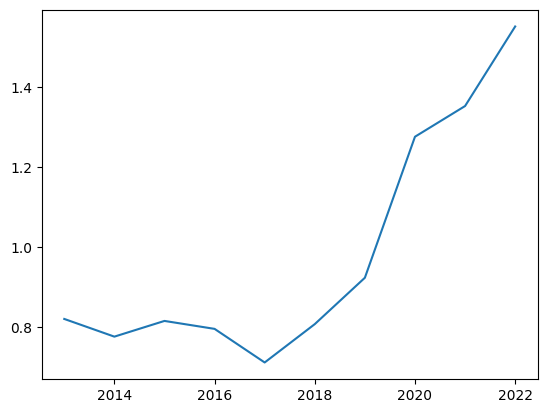

In [57]:
plt.plot(
    years, ratios   
)